<a href="https://colab.research.google.com/github/guyyone/IFPERA-data-science/blob/main/notebook_1_dr_bel_charvette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataset_belinga_1_corr_1.xlsx to dataset_belinga_1_corr_1.xlsx


**PREMIERE PARTIE ANALYSES STATISTIQUE**

In [249]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline

In [312]:
df = pd.read_excel("dataset_belinga_1_corr_1.xlsx")
df.head(2)

,lieu,date,modercueil,enqueteur,enquete,num,age,sexe,taille,vem1,...,FEV1FVC_zscore,FVC_zscore,FEF2575_zscore,FEV1_LLN,FEV1FVC_LLN,FEV1FVC_ULN,FVC_LLN,FEF2575_LLN,CPT_pred,LLN_CPT
0,CLINIQUE POLYMERE,2023-04-04,FICHE RESULTAT,Dr BELINGA,JEANZU,1,80,1,167,2.19,...,0.94,0.21,-0.61,1.04,0.65,0.90,1.57,2.03,6.111,4.749
1,CLINIQUE POLYMERE,2023-04-05,FICHE RESULTAT,Dr BELINGA,MadBIM,2,88,2,159,1.01,...,0.08,-1.36,-4.15,0.89,0.65,0.92,1.18,2.33,NaN,NaN


In [313]:
df.columns

Index(['lieu', 'date', 'modercueil', 'enqueteur', 'enquete', 'num', 'age',
       'sexe', 'taille', 'vem1', 'cvf1', 'vemscvf1', 'dem2575ls1', 'texs1',
       'aex1', 'vemscv1', 'vem2', 'cvf2', 'vemscvf2', 'depls2', 'dem25ls2',
       'dem50ls2', 'dem75ls2', 'dem2575ls2', 'texs2', 'aex2', 'vemscv2',
       'cpt1', 'vr1', 'vgt1', 'vrcpt1', 'ic1', 'vgtcpt1', 'gawlskpa1',
       'srawkpa1', 'rvakpals1', 'sgawkpas1', 'cpt2', 'vr2', 'vgt2', 'vrcpt2',
       'ic2', 'vgtcpt2', 'gawlskpa2', 'srawkpa2', 'rvakpals2', 'sgawkpas2',
       'FEV1_predicted', 'FEV1FVC_predicted', 'FVC_predicted',
       'FEF2575_predicted', 'FEV1_zscore', 'FEV1FVC_zscore', 'FVC_zscore',
       'FEF2575_zscore', 'FEV1_LLN', 'FEV1FVC_LLN', 'FEV1FVC_ULN', 'FVC_LLN',
       'FEF2575_LLN', 'CPT_pred', 'LLN_CPT'],
      dtype='object')

In [314]:
df["vemscvf1"].head(2)

0    85
1    79
Name: vemscvf1, dtype: int64

In [315]:
df['LLN_CPT'].head(2)

0    4.749
1      NaN
Name: LLN_CPT, dtype: float64

In [316]:
df["vemscvf1"] = df["vemscvf1"]/100
df['LLN_CPT'] = df['LLN_CPT']* (1-0.12)

In [317]:
df['LLN_CPT'].head(2)

0    4.17912
1        NaN
Name: LLN_CPT, dtype: float64

In [318]:
df['LLN_CPT'].isna().sum()

9

In [319]:
((df['vemscvf1'] >= df.FEV1FVC_LLN) &(df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT)).value_counts()

False    378
True      24
dtype: int64

In [320]:
#| (df.vemscvf1 >= df.FEV1FVC_LLN  & df.cvf1<df.FVC_LLN & df.cpt1>df.LLN_CPT)
masq_osb = ((df['vemscvf1'] < df['FEV1FVC_LLN']) & (df['cvf1'] > df['FVC_LLN'])) | ((df['vemscvf1'] >= df['FEV1FVC_LLN'])  & (df['cvf1']<df['FVC_LLN']) & (df['cpt1']>df['LLN_CPT']))
df_obs = df[masq_osb]
masq_rest = ((df['vemscvf1'] >= df.FEV1FVC_LLN) & (df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT))
df_rest = df[masq_rest]
masq_mixt = (df['vemscvf1'] < df.FEV1FVC_LLN) & (df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT)
df_mixt = df[masq_mixt]
masq_normaux = (df.cvf1>=df.FVC_LLN) & (df['vemscvf1'] > df.FEV1FVC_LLN)
df_normaux  = df[masq_normaux]

In [321]:
df_normaux["type_trouble"] = 0
df_obs["type_trouble"] = 1
df_rest["type_trouble"] = 2
df_mixt["type_trouble"] = 3

In [322]:
df_normaux.shape

(301, 63)

In [323]:
df_obs.shape

(56, 63)

In [324]:
df_rest.shape

(24, 63)

In [257]:
df_all = pd.concat([df_normaux, df_obs, df_rest, df_mixt], axis = 0)

In [325]:
df_all["type_trouble"].value_counts()

0    349
2     35
1     16
Name: type_trouble, dtype: int64

In [326]:
df_analysis = pd.concat([df_normaux, df_obs, df_rest], axis = 0)
df_analysis["type_trouble"].value_counts(normalize=True)

0    0.790026
1    0.146982
2    0.062992
Name: type_trouble, dtype: float64

In [327]:
df.columns

Index(['lieu', 'date', 'modercueil', 'enqueteur', 'enquete', 'num', 'age',
       'sexe', 'taille', 'vem1', 'cvf1', 'vemscvf1', 'dem2575ls1', 'texs1',
       'aex1', 'vemscv1', 'vem2', 'cvf2', 'vemscvf2', 'depls2', 'dem25ls2',
       'dem50ls2', 'dem75ls2', 'dem2575ls2', 'texs2', 'aex2', 'vemscv2',
       'cpt1', 'vr1', 'vgt1', 'vrcpt1', 'ic1', 'vgtcpt1', 'gawlskpa1',
       'srawkpa1', 'rvakpals1', 'sgawkpas1', 'cpt2', 'vr2', 'vgt2', 'vrcpt2',
       'ic2', 'vgtcpt2', 'gawlskpa2', 'srawkpa2', 'rvakpals2', 'sgawkpas2',
       'FEV1_predicted', 'FEV1FVC_predicted', 'FVC_predicted',
       'FEF2575_predicted', 'FEV1_zscore', 'FEV1FVC_zscore', 'FVC_zscore',
       'FEF2575_zscore', 'FEV1_LLN', 'FEV1FVC_LLN', 'FEV1FVC_ULN', 'FVC_LLN',
       'FEF2575_LLN', 'CPT_pred', 'LLN_CPT'],
      dtype='object')

In [328]:
df_analysis = pd.concat([df_normaux, df_obs, df_rest], axis = 0)
df_analysis["type_trouble"].value_counts()

0    301
1     56
2     24
Name: type_trouble, dtype: int64

In [329]:
df_analysis["type_trouble"].value_counts(normalize=True)

0    0.790026
1    0.146982
2    0.062992
Name: type_trouble, dtype: float64

In [330]:
data1 = df_analysis[['sexe', 'age', 'vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
data1

,sexe,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1,type_trouble
0,1,80,2.19,2.57,0.85,0.94,7.39,0
1,2,88,1.01,1.28,0.79,0.08,1.49,0
2,2,66,2.31,2.61,0.89,1.12,8.35,0
3,1,35,3.00,3.37,0.89,0.73,21.19,0
4,1,50,3.08,3.86,0.80,-0.32,12.16,0
...,...,...,...,...,...,...,...,...
340,2,74,1.00,1.07,0.93,1.63,1.97,2
341,2,62,0.58,0.74,0.78,-0.42,0.52,2
365,2,52,1.10,1.22,0.90,1.08,1.94,2
382,1,24,2.82,3.21,0.88,0.04,10.18,2


In [331]:
data = df_analysis[['sexe', 'age', 'vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]

In [332]:
data1.type_trouble.dtypes

dtype('int64')

In [333]:
data1["sexe"]=pd.Categorical(data1["sexe"],ordered=False)
data1["type_trouble"]=pd.Categorical(data1["type_trouble"],ordered=False)
data1.dtypes

sexe              category
age                  int64
vem1               float64
cvf1               float64
vemscvf1           float64
FEV1FVC_zscore     float64
aex1               float64
type_trouble      category
dtype: object

In [334]:
df_hommes = data1.query('sexe == 1')
df_femmes = data1.query('sexe == 2')
df_normal = data1.query('type_trouble == 0')
df_obstructif = data1.query('type_trouble == 1')
df_restrictif = data1.query('type_trouble == 2')

In [335]:
data1["sexe"] = data1["sexe"].cat.rename_categories(['homme','femme']) #1=Hommes, 2=femmes
data1["type_trouble"] = data1["type_trouble"].cat.rename_categories(['normal', 'obstructif', 'restrictif']) #0=normal #1=obstructif, 2=restrictif
data1.head(3)

,sexe,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1,type_trouble
0,homme,80,2.19,2.57,0.85,0.94,7.39,normal
1,femme,88,1.01,1.28,0.79,0.08,1.49,normal
2,femme,66,2.31,2.61,0.89,1.12,8.35,normal


In [ ]:
#data1["sexe"] = data1["sexe"].cat.rename_categories(['1','2']) #1=Hommes, 2=femmes
#data1["type_trouble"] = data1["type_trouble"].cat.rename_categories(['0', '1', '2']) #0=normal #1=obstructif, 2=restrictif
#data1

In [336]:
data1['vem1'] = data1['vem1'].astype(float, errors = 'raise')
data1['cvf1'] = data1['cvf1'].astype(float, errors = 'raise')
data1['vemscvf1'] = data1['vemscvf1'].astype(float, errors = 'raise')
data1['FEV1FVC_zscore'] = data1['FEV1FVC_zscore'].astype(float, errors = 'raise')
data1['aex1'] = data1['aex1'].astype(float, errors = 'raise')

In [337]:
#data1.dtypes

In [338]:
df_hommes['sexe'] = 'homme'
df_femmes['sexe'] = 'femme'
df_normal['type_trouble'] = 'normal'
df_obstructif['type_trouble'] = 'obstructif'
df_restrictif['type_trouble'] = 'restrictif'

In [339]:
#df_hommes.head()

## Stats

### Analyse univariées

In [ ]:
data1.sexe.value_counts()

femme    209
homme    172
Name: sexe, dtype: int64

In [ ]:
data1.sexe.value_counts(normalize=True)

femme    0.548556
homme    0.451444
Name: sexe, dtype: float64

In [ ]:
data1.type_trouble.value_counts()

normal        301
obstructif     56
restrictif     24
Name: type_trouble, dtype: int64

In [ ]:
data1.type_trouble.value_counts(normalize=True)

normal        0.790026
obstructif    0.146982
restrictif    0.062992
Name: type_trouble, dtype: float64

<Axes: xlabel='sexe'>

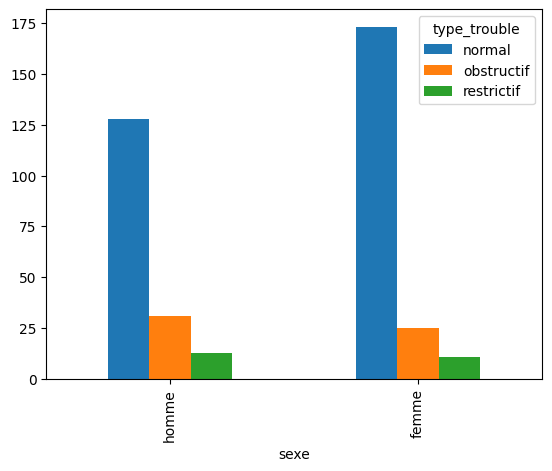

In [ ]:
t = pd.crosstab(data1.sexe, data1.type_trouble)
t.plot.bar()

### Analyse univariées des variables quantitatives

### Analyse numérique

In [ ]:
data2 = data1.describe().T
print("description_num1")
print(round(data2, 2))

description_num1
                count  mean   std   min   25%   50%    75%    max
vem1            381.0  2.31  0.85  0.56  1.58  2.29   2.84   4.54
cvf1            381.0  2.71  0.98  0.67  1.93  2.65   3.34   5.63
vemscvf1        381.0  0.85  0.08  0.44  0.82  0.86   0.90   1.00
FEV1FVC_zscore  381.0 -0.22  1.23 -6.44 -0.71 -0.06   0.53   2.84
aex1            381.0  8.82  6.21  0.52  3.84  7.70  11.88  29.89


In [ ]:
data3 = data1.drop(columns = ['sexe', 'type_trouble']).agg(["count", "min", "max", "median", "mean", "skew"]).T
print("description_num2 ")
print(round(data3, 2))

description_num2 
                count   min    max  median  mean  skew
vem1            381.0  0.56   4.54    2.29  2.31  0.37
cvf1            381.0  0.67   5.63    2.65  2.71  0.39
vemscvf1        381.0  0.44   1.00    0.86  0.85 -1.54
FEV1FVC_zscore  381.0 -6.44   2.84   -0.06 -0.22 -1.37
aex1            381.0  0.52  29.89    7.70  8.82  1.05


### test de normalité

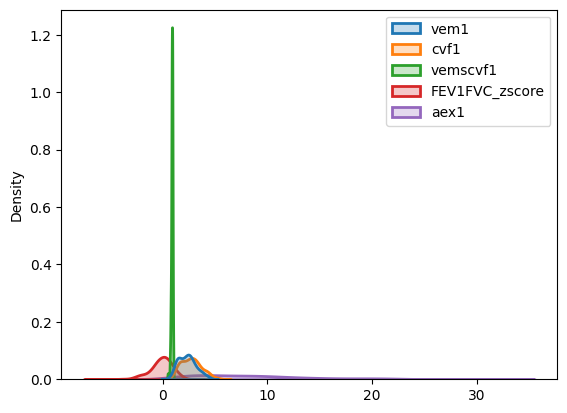

In [ ]:
import seaborn as sns
sns.kdeplot(data1, shade=True, linewidth=2);

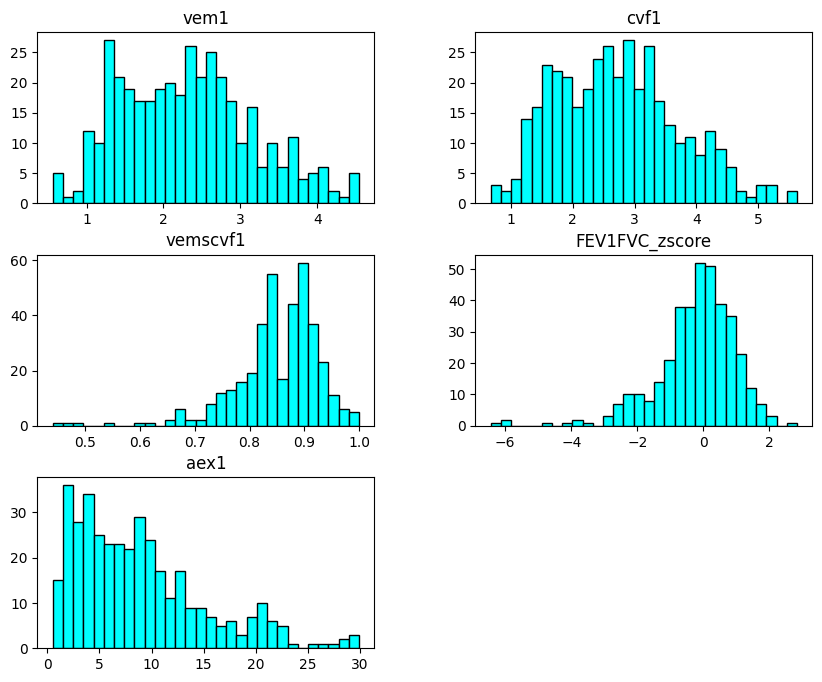

In [ ]:
def multi_hist(data1, bins ):
    fig = plt.figure (figsize= (10,8))
    ax = fig.gca()
    hist = data1.iloc[:-1].hist(ax = ax, bins=bins, grid= False, edgecolor = "black", color = "cyan")

multi_hist(data1, bins=30)

In [ ]:
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn

In [ ]:
# test de shapiro
shapiro(data1 ['vem1'])

ShapiroResult(statistic=0.9799290299415588, pvalue=3.829734487226233e-05)



```

```

##### la distribution n'est pas normale

In [ ]:
shapiro(data1 ['cvf1'])

ShapiroResult(statistic=0.9811657071113586, pvalue=7.123698742361739e-05)

In [ ]:
shapiro(data1 ['FEV1FVC_zscore'])

ShapiroResult(statistic=0.9216037392616272, pvalue=3.251386247911381e-13)

In [ ]:
shapiro(data1 ['FEV1FVC_zscore'])

ShapiroResult(statistic=0.9216037392616272, pvalue=3.251386247911381e-13)

In [ ]:
shapiro(data1 ['aex1'])

ShapiroResult(statistic=0.9113059043884277, pvalue=3.645986575259892e-14)

### écart type

In [ ]:
ecartType = np.std(data1)
print ("Le ecart type de data1 est : ", round(ecartType, 2))

Le ecart type de data1 est :  vem1              0.85
cvf1              0.98
vemscvf1          0.08
FEV1FVC_zscore    1.22
aex1              6.20
dtype: float64


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.age, 25))

In [ ]:
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.age, 75))

In [ ]:
print("Quartile Q1 vaut : ", round(np.percentile(data1.age, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.age, 75)))

Quartile Q1 vaut :  14
Quartile Q3 vaut :  50


In [ ]:
# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

L ecart interquartile vaut :  36


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.vem1, 25))

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.vem1, 75))

print("Quartile Q1 vaut : ", round(np.percentile(data1.vem1, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.vem1, 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  2
Quartile Q3 vaut :  3
L ecart interquartile vaut :  1


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.cvf1, 25))

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.cvf1, 75))

print("Quartile Q1 vaut : ", round(np.percentile(data1.cvf1, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.cvf1, 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  2
Quartile Q3 vaut :  3
L ecart interquartile vaut :  1


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.vemscvf1, 25))

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.vemscvf1, 75))

print("Quartile Q1 vaut : ", round(np.percentile(data1.vemscvf1, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.vemscvf1, 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  1
Quartile Q3 vaut :  1
L ecart interquartile vaut :  0


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.aex1, 25))

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.aex1, 75))

print("Quartile Q1 vaut : ", round(np.percentile(data1.aex1, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.aex1, 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  4
Quartile Q3 vaut :  12
L ecart interquartile vaut :  8


In [ ]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(data1.FEV1FVC_zscore, 25))

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(data1.FEV1FVC_zscore, 75))

print("Quartile Q1 vaut : ", round(np.percentile(data1.FEV1FVC_zscore, 25)))
print("Quartile Q3 vaut : ", round(np.percentile(data1.FEV1FVC_zscore, 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  -1
Quartile Q3 vaut :  1
L ecart interquartile vaut :  2


### Test de Wilcoxon

In [ ]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [ ]:
#pg.mwu(data1.vem1, data1['FEV1FVC_zscore'], alternative='two-sided')

In [ ]:
import scipy

In [ ]:
scipy.stats.mannwhitneyu(data1.vem1, data1['FEV1FVC_zscore'], alternative='two-sided')

MannwhitneyuResult(statistic=141890.5, pvalue=3.341969671038118e-115)

In [ ]:
scipy.stats.mannwhitneyu(data1.cvf1, data1['FEV1FVC_zscore'])

MannwhitneyuResult(statistic=143355.5, pvalue=4.861513472814392e-120)

In [ ]:
scipy.stats.mannwhitneyu(data1['vemscvf1'], data1['FEV1FVC_zscore'])

MannwhitneyuResult(statistic=122096.5, pvalue=9.627855470549855e-60)

In [ ]:
scipy.stats.mannwhitneyu(data1.aex1, data1['FEV1FVC_zscore'])

MannwhitneyuResult(statistic=144290.0, pvalue=3.540114069411818e-123)

### Moyenne par catégories de sexe

In [ ]:
data1.groupby('sexe').mean().reset_index()

,sexe,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
0,homme,29.633721,2.564477,3.040058,0.844186,-0.414965,10.873023
1,femme,36.703349,2.095742,2.443014,0.856746,-0.062919,7.136364


### Mediane par catégories de sexe

In [ ]:
data1.groupby('sexe').median().reset_index()

,sexe,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
0,homme,21.5,2.525,2.95,0.86,-0.215,9.57
1,femme,31.0,2.150,2.45,0.87,0.040,6.63


### Ecart type par catégories de sexe

In [ ]:
# ecart type chez les hommes
np.std(df_hommes)

age               21.213741
vem1               0.951911
cvf1               1.085364
vemscvf1           0.084192
FEV1FVC_zscore     1.410054
aex1               7.367125
dtype: float64

In [ ]:
# ecart type chez femmes

In [ ]:
np.std(df_femmes)

age               22.374970
vem1               0.694280
cvf1               0.790603
vemscvf1           0.071578
FEV1FVC_zscore     1.018465
aex1               4.377124
dtype: float64

### Moyenne par type de trouble

In [ ]:
data1.groupby('type_trouble').mean().reset_index()

,type_trouble,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
0,normal,33.810631,2.466977,2.845150,0.867841,0.07285,9.908173
1,obstructif,27.232143,1.817857,2.434464,0.763036,-1.92450,5.222679
2,restrictif,44.416667,1.447500,1.698333,0.846250,0.05500,3.617917


### Mediane par type de trouble

In [ ]:
data1.groupby('type_trouble').median().reset_index()

,type_trouble,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
0,normal,28.0,2.410,2.780,0.870,0.050,8.770
1,obstructif,22.5,1.645,2.215,0.775,-2.095,3.555
2,restrictif,45.0,1.255,1.425,0.860,-0.220,2.275


Ecart type par type de trouble

### Comparer moyenne, médiane, écart type de chaque type de trouble

In [ ]:
data1.groupby('type_trouble').agg(moyenne = ('vem1', np.mean), mediane = ('vem1', np.median), ecart_type = ('vem1', np.std))

,moyenne,mediane,ecart_type
type_trouble,,,
normal,2.466977,2.410,0.811039
obstructif,1.817857,1.645,0.751841
restrictif,1.447500,1.255,0.661745


In [ ]:
# ecart type chez les normaux
#np.std(df_normal)

In [ ]:
# ecart type chez les obstructifs
#np.std(df_obstructif)

In [ ]:
# ecart type chez les restrictifs
#np.std(df_restrictif)

In [ ]:
data1.groupby("type_trouble").apply(np.std)

,age,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
type_trouble,,,,,,
normal,22.103968,0.809691,0.929192,0.054775,0.776455,6.227332
obstructif,19.614127,0.745098,1.037342,0.114563,1.745380,4.291913
restrictif,23.323659,0.647812,0.719778,0.078412,1.081542,3.041996


In [ ]:
#data1.groupby('type_trouble').agg(moyenne = (data1, np.mean), mediane = (data1, np.median), ecart_type = (data1, np.std))

### Ecart type par type de trouble

In [ ]:
# ecart type chez les normaux
np.std(df_normal)

age               22.103968
vem1               0.809691
cvf1               0.929192
vemscvf1           0.054775
FEV1FVC_zscore     0.776455
aex1               6.227332
dtype: float64

In [ ]:
# ecart type chez les obstructifs
np.std(df_obstructif)

age               19.614127
vem1               0.745098
cvf1               1.037342
vemscvf1           0.114563
FEV1FVC_zscore     1.745380
aex1               4.291913
dtype: float64

In [ ]:
# ecart type chez les restrictifs
np.std(df_restrictif)

age               23.323659
vem1               0.647812
cvf1               0.719778
vemscvf1           0.078412
FEV1FVC_zscore     1.081542
aex1               3.041996
dtype: float64

<Axes: title={'center': 'aex1'}, xlabel='[type_trouble]'>

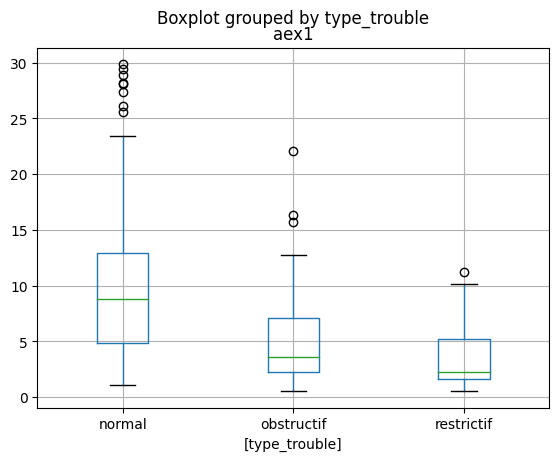

In [ ]:
# Analyse bivariée entre l'AEX et les trouble obstructifs
data1.boxplot(column=["aex1"], by=["type_trouble"])

**DEUXIEME PARTIE MACHINE LEARNING**



>**Importation des packages pour le developpement du**



In [271]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier



> **Définition des mitriques pour la mesures des performances des models: f1 sera retenu**



In [272]:
from sklearn.metrics import make_scorer#, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve



> **Définition de la fonction d'évaluation des models**



In [273]:
def evaluation(model):
    ypred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))



> **Selection de la base des données du travail**



In [353]:
df = df_analysis[['vem1', 'cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]

In [354]:
df["type_trouble"].value_counts(normalize=True)

0    0.790026
1    0.146982
2    0.062992
Name: type_trouble, dtype: float64

In [356]:
df.shape, df.head()

((381, 6),
    vem1  cvf1  vemscvf1  FEV1FVC_zscore   aex1  type_trouble
 0  2.19  2.57      0.85            0.94   7.39             0
 1  1.01  1.28      0.79            0.08   1.49             0
 2  2.31  2.61      0.89            1.12   8.35             0
 3  3.00  3.37      0.89            0.73  21.19             0
 4  3.08  3.86      0.80           -0.32  12.16             0)

In [357]:
data = df



> **Instanciation des models:  *nous allons fixer le générateur aléatoire à 1***



In [277]:
RF = RandomForestClassifier(random_state=1)
LR = LogisticRegression(random_state=1)
GB = GradientBoostingClassifier(random_state=1)
ANN = MLPClassifier(random_state=1)



> **Models avec les données brutes et avec seulement aex1 comme prédicteur**





> Selection des prédicteurs et de la variable réponse

In [278]:
X = df[['aex1']]
y = df['type_trouble']



> Diviser la base en deux groupe, un pour l'entrainement(70% de df) et l'autre pour le test(30% de df).



In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

In [280]:
X_train.shape, y_train.shape, y_train.value_counts(), y_train.value_counts()

((200, 1),
 (200,),
 0    173
 2     20
 1      7
 Name: type_trouble, dtype: int64,
 0    173
 2     20
 1      7
 Name: type_trouble, dtype: int64)



> Normalisation des variables pour entrainner les models LR et ANN



In [281]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled=  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



> Entrainement des models



In [282]:
print(RF.fit(X_train, y_train))
print(GB.fit(X_train, y_train))
print(LR.fit(X_train_scaled, y_train))
print(ANN.fit(X_train_scaled, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=



> Evaluation



In [283]:
print("TRAIN REPORT")
print(classification_report(y_train, RF.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=RF))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       173
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200

TEST REPORT
[[158   1  17]
 [  4   0   5]
 [  9   0   6]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       176
           1       0.00      0.00      0.00         9
           2       0.21      0.40      0.28        15

    accuracy                           0.82       200
   macro avg       0.38      0.43      0.40       200
weighted avg       0.83      0.82      0.82       200

None


In [284]:
print("TRAIN REPORT")
print(classification_report(y_train, GB.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=GB))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       173
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200

TEST REPORT
[[158   1  17]
 [  4   0   5]
 [  9   0   6]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       176
           1       0.00      0.00      0.00         9
           2       0.21      0.40      0.28        15

    accuracy                           0.82       200
   macro avg       0.38      0.43      0.40       200
weighted avg       0.83      0.82      0.82       200

None


In [285]:
print("TRAIN REPORT")
print(classification_report(y_train, LR.predict(X_train_scaled)))

print("TEST REPORT")
print(evaluation(model=LR))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       173
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        20

    accuracy                           0.86       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.75      0.86      0.80       200

TEST REPORT
[[176   0   0]
 [  9   0   0]
 [ 15   0   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15

    accuracy                           0.88       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.77      0.88      0.82       200

None


In [286]:
print("TRAIN REPORT")
print(classification_report(y_train, ANN.predict(X_train_scaled)))

print("TEST REPORT")
print(evaluation(model=ANN))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       173
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        20

    accuracy                           0.86       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.75      0.86      0.80       200

TEST REPORT
[[176   0   0]
 [  9   0   0]
 [ 15   0   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15

    accuracy                           0.88       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.77      0.88      0.82       200

None




> Les models sont très mauvais; on ne peut donc pas utiliser aex1 pour seul feature pour la classification des troubles respiratiores




> **models avec pour feautures 'vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1'**



In [287]:
X = df[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = df['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

X_train.head(2)

,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
165,1.32,1.43,92,0.07,2.40
270,2.22,2.37,94,0.80,6.86




> **Models avec les données brutes et avec 'FEV','FVC','FEV/FVC','FEV1FVC_zscore','AEX' comme prédicteur**





> Normalisation



In [288]:
X_train_scaled=  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



> Entrainement



In [289]:
print(RF.fit(X_train, y_train))
print(GB.fit(X_train, y_train))
print(LR.fit(X_train_scaled, y_train))
print(ANN.fit(X_train_scaled, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=

In [290]:
print("TRAIN REPORT")
print(classification_report(y_train, RF.predict(X_train)))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200





> Evaluation



In [291]:
print("TRAIN REPORT")
print(classification_report(y_train, RF.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=RF))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

TEST REPORT
[[159   4  13]
 [  3   0   6]
 [ 10   0   5]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       176
           1       0.00      0.00      0.00         9
           2       0.21      0.33      0.26        15

    accuracy                           0.82       200
   macro avg       0.38      0.41      0.39       200
weighted avg       0.83      0.82      0.82       200

None


In [292]:
print("TRAIN REPORT")
print(classification_report(y_train, GB.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=GB))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

TEST REPORT
[[153   9  14]
 [  3   0   6]
 [  9   1   5]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       176
           1       0.00      0.00      0.00         9
           2       0.20      0.33      0.25        15

    accuracy                           0.79       200
   macro avg       0.38      0.40      0.38       200
weighted avg       0.83      0.79      0.81       200

None


In [293]:
print("TRAIN REPORT")
print(classification_report(y_train, LR.predict(X_train_scaled)))

print("TEST REPORT")
print(evaluation(model=LR))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       173
           1       0.00      0.00      0.00         7
           2       0.91      0.50      0.65        20

    accuracy                           0.91       200
   macro avg       0.61      0.50      0.53       200
weighted avg       0.88      0.91      0.89       200

TEST REPORT
[[176   0   0]
 [  9   0   0]
 [ 15   0   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15

    accuracy                           0.88       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.77      0.88      0.82       200

None


In [294]:
print("TRAIN REPORT")
print(classification_report(y_train, ANN.predict(X_train_scaled)))

print("TEST REPORT")
print(evaluation(model=ANN))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       173
           1       0.00      0.00      0.00         7
           2       0.90      0.45      0.60        20

    accuracy                           0.91       200
   macro avg       0.60      0.48      0.52       200
weighted avg       0.87      0.91      0.88       200

TEST REPORT
[[176   0   0]
 [  9   0   0]
 [ 15   0   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15

    accuracy                           0.88       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.77      0.88      0.82       200

None




> Les performances de RF et GB s'améliorent tandis que RL et ANN ne s'améliorent pas





> courbes d'apprentissage





>

1.   Avec les données brutes

In [299]:
#pip install pycaret
from pycaret.classification import *



> Choix des prédicteurs et de la variable réponse



In [340]:
X = data[['vem1', 'cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = data['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

In [308]:
#X_train.shape, y_train.shape

In [342]:
df = data[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df = pd.concat([X_train, y_train], axis = 1)
df.shape, df['type_trouble'].value_counts()

((190, 6),
 0    148
 1     29
 2     13
 Name: type_trouble, dtype: int64)



> **Optimisation**





> ***1- augmenter les données des classes minoritaires pour les équilibrer sur la classe majoritairet***



In [ ]:
from imblearn.over_sampling import SMOTE



> Choix des prédicteurs et de la variable réponse



In [ ]:
oversample = SMOTE()

X = data[['vem1', 'age', 'cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = data['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
y_over.value_counts()

0    148
2    148
1    148
Name: type_trouble, dtype: int64

In [ ]:
#X_over.head()

,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
0,1.56,2.04,0.76,-0.53,3.84
1,2.67,3.63,0.74,-1.50,9.83
2,3.75,4.39,0.85,-0.59,19.21
3,2.71,3.25,0.83,-0.30,11.05
4,3.11,3.65,0.85,0.22,11.88


In [ ]:
df_o = df[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df_o = pd.concat([X_over, y_over], axis = 1)
df_o.shape, df_o['type_trouble'].value_counts()



> Instanciation



In [ ]:
RF_o = RandomForestClassifier(random_state=1)
LR_o = LogisticRegression(random_state=1)
GB_o = GradientBoostingClassifier(random_state=1)
ANN_o = MLPClassifier(random_state=1)



> Normalisation



In [ ]:
X_train_scaled=  scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)



> Entrainement



In [ ]:
print(RF_o.fit(X_over, y_over))
print(GB_o.fit(X_over, y_over))
print(LR_o.fit(X_train_scaled, y_over))
print(ANN_o.fit(X_train_scaled, y_over))

RandomForestClassifier(random_state=1)
GradientBoostingClassifier(random_state=1)
LogisticRegression(random_state=1)
MLPClassifier(random_state=1)




> Evaluation



In [ ]:
print("TRAIN REPORT")
print(classification_report(y_train, RF_o.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=RF_o))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        13

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190

TEST REPORT
[[132   5  16]
 [  3  23   1]
 [  3   0   8]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       153
           1       0.82      0.85      0.84        27
           2       0.32      0.73      0.44        11

    accuracy                           0.85       191
   macro avg       0.70      0.81      0.73       191
weighted avg       0.90      0.85      0.87       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_train, GB_o.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=GB_o))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        13

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190

TEST REPORT
[[130   3  20]
 [  3  22   2]
 [  4   0   7]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       153
           1       0.88      0.81      0.85        27
           2       0.24      0.64      0.35        11

    accuracy                           0.83       191
   macro avg       0.69      0.77      0.70       191
weighted avg       0.90      0.83      0.86       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_train, LR_o.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=LR_o))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       148
           1       0.45      0.72      0.55        29
           2       0.00      0.00      0.00        13

    accuracy                           0.78       190
   macro avg       0.44      0.53      0.48       190
weighted avg       0.76      0.78      0.76       190

TEST REPORT
[[138  15   0]
 [  5  22   0]
 [  8   3   0]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       153
           1       0.55      0.81      0.66        27
           2       0.00      0.00      0.00        11

    accuracy                           0.84       191
   macro avg       0.49      0.57      0.52       191
weighted avg       0.81      0.84      0.82       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_train, ANN_o.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=ANN_o))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       148
           1       0.88      0.48      0.62        29
           2       0.00      0.00      0.00        13

    accuracy                           0.85       190
   macro avg       0.57      0.49      0.51       190
weighted avg       0.79      0.85      0.81       190

TEST REPORT
[[153   0   0]
 [ 15  12   0]
 [ 10   1   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       153
           1       0.92      0.44      0.60        27
           2       0.00      0.00      0.00        11

    accuracy                           0.86       191
   macro avg       0.59      0.48      0.51       191
weighted avg       0.82      0.86      0.83       191

None



>
2.   Avec over sampling





In [ ]:
df_o = data[['vem1', 'age','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df_o = pd.concat([X_over, y_over], axis = 1)
df_o.shape, df_o['type_trouble'].value_counts()

((444, 7),
 0    148
 2    148
 1    148
 Name: type_trouble, dtype: int64)



> 2- diminuer les données des classes majoritaires pour les équilibrer sur la classe minoritaires



In [ ]:
from collections import Counter
from imblearn.datasets import make_imbalance

In [ ]:
X = df[['age', 'vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = df['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

In [ ]:
X_train.head(), df['type_trouble'].value_counts()

(     age  vem1  cvf1  vemscvf1  FEV1FVC_zscore   aex1
 337   67  1.56  2.04      0.76           -0.53   3.84
 332   41  2.67  3.63      0.74           -1.50   9.83
 309   24  3.75  4.39      0.85           -0.59  19.21
 27    36  2.71  3.25      0.83           -0.30  11.05
 351   43  3.11  3.65      0.85            0.22  11.88,
 0    301
 1     56
 2     24
 Name: type_trouble, dtype: int64)

In [ ]:
print(f'Distribution before imbalancing: {Counter(y)}')

Distribution before imbalancing: Counter({0: 301, 1: 56, 2: 24})


In [ ]:
X_under, y_under = make_imbalance(X, y,
                              sampling_strategy={0: 24, 1: 24, 2: 24},
                              random_state=0)

In [ ]:
df_u = df[['vem1', 'age','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df_u = pd.concat([X_under, y_under], axis = 1)
df_u.shape, df_u['type_trouble'].value_counts()

((72, 7),
 0    24
 1    24
 2    24
 Name: type_trouble, dtype: int64)



> Instanciation



In [ ]:
RF_u = RandomForestClassifier(random_state=1)
LR_u = LogisticRegression(random_state=1)
GB_u = GradientBoostingClassifier(random_state=1)
ANN_u = MLPClassifier(random_state=1)



> Normalisation



In [ ]:
X_train_scaled=  scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)



> Entrainement



In [ ]:
print(RF_u.fit(X_under, y_under))
print(GB_u.fit(X_under, y_under))
print(LR_u.fit(X_train_scaled, y_under))
print(ANN_u.fit(X_train_scaled, y_under))

RandomForestClassifier(random_state=1)
GradientBoostingClassifier(random_state=1)
LogisticRegression(random_state=1)
MLPClassifier(random_state=1)




> Evaluation



In [ ]:
print("TRAIN REPORT")
print(classification_report(y_under, RF_u.predict(X_under)))

print("TEST REPORT")
print(evaluation(model=RF_u))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

TEST REPORT
[[116   5  32]
 [  0  25   2]
 [  0   0  11]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       153
           1       0.83      0.93      0.88        27
           2       0.24      1.00      0.39        11

    accuracy                           0.80       191
   macro avg       0.69      0.89      0.71       191
weighted avg       0.93      0.80      0.84       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_under, GB_u.predict(X_under)))

print("TEST REPORT")
print(evaluation(model=GB_u))

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

TEST REPORT
[[123   5  25]
 [  0  25   2]
 [  0   0  11]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       153
           1       0.83      0.93      0.88        27
           2       0.29      1.00      0.45        11

    accuracy                           0.83       191
   macro avg       0.71      0.91      0.74       191
weighted avg       0.94      0.83      0.86       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_under, LR_u.predict(X_under)))

print("TEST REPORT")
print(evaluation(model=LR_u))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        24
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        24

    accuracy                           0.33        72
   macro avg       0.11      0.33      0.17        72
weighted avg       0.11      0.33      0.17        72

TEST REPORT
[[153   0   0]
 [ 27   0   0]
 [ 11   0   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       153
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        11

    accuracy                           0.80       191
   macro avg       0.27      0.33      0.30       191
weighted avg       0.64      0.80      0.71       191

None


In [ ]:
print("TRAIN REPORT")
print(classification_report(y_under, ANN_u.predict(X_under)))

print("TEST REPORT")
print(evaluation(model=ANN_u))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        24
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        24

    accuracy                           0.33        72
   macro avg       0.11      0.33      0.17        72
weighted avg       0.11      0.33      0.17        72

TEST REPORT
[[153   0   0]
 [ 27   0   0]
 [ 11   0   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       153
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        11

    accuracy                           0.80       191
   macro avg       0.27      0.33      0.30       191
weighted avg       0.64      0.80      0.71       191

None




> **Modèles avec pycaret et Recherche des hypers paramètres**



In [482]:
df = data

In [483]:
data.head()

,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1,type_trouble
0,2.19,2.57,0.85,0.94,7.39,0
1,1.01,1.28,0.79,0.08,1.49,0
2,2.31,2.61,0.89,1.12,8.35,0
3,3.00,3.37,0.89,0.73,21.19,0
4,3.08,3.86,0.80,-0.32,12.16,0


In [484]:
from pycaret.classification import *

In [485]:
df = data[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df = pd.concat([X_train, y_train], axis = 1)
df.shape, df['type_trouble'].value_counts()

((95, 6),
 0    70
 1    17
 2     8
 Name: type_trouble, dtype: int64)

In [486]:
c1 = setup (data = data, target = 'type_trouble',  session_id=123, verbose = True)

,Description,Value
0,Session id,123
1,Target,type_trouble
2,Target type,Multiclass
3,Original data shape,"(381, 6)"
4,Transformed data shape,"(381, 6)"
5,Transformed train set shape,"(266, 6)"
6,Transformed test set shape,"(115, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [487]:
RF = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.8696,0.9259,0.8583,0.8906,0.7652,0.7926
1,0.9259,0.9985,0.9259,0.9333,0.9275,0.8105,0.8147
2,0.9259,0.8895,0.9259,0.9324,0.9188,0.7672,0.7888
3,0.8519,0.7298,0.8519,0.8015,0.8089,0.4490,0.5375
4,0.7407,0.8310,0.7407,0.6651,0.6991,0.1127,0.1222
5,0.9259,0.9286,0.9259,0.9276,0.9237,0.7849,0.7901
6,0.9231,0.9724,0.9231,0.9441,0.9171,0.7451,0.7589
7,0.9615,0.9823,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.8838,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [488]:
tuned_RF = tune_model(RF, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.8740,0.8889,0.8256,0.8552,0.6721,0.6836
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9259,0.9008,0.9259,0.9324,0.9188,0.7672,0.7888
3,0.8519,0.7688,0.8519,0.8015,0.8089,0.4490,0.5375
4,0.8148,0.7036,0.8148,0.7764,0.7543,0.2458,0.3727
5,0.9259,0.8926,0.9259,0.9276,0.9237,0.7849,0.7901
6,0.9231,0.9127,0.9231,0.9441,0.9171,0.7451,0.7589
7,0.9615,0.8769,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9446,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [368]:
evaluate_model(tuned_RF)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

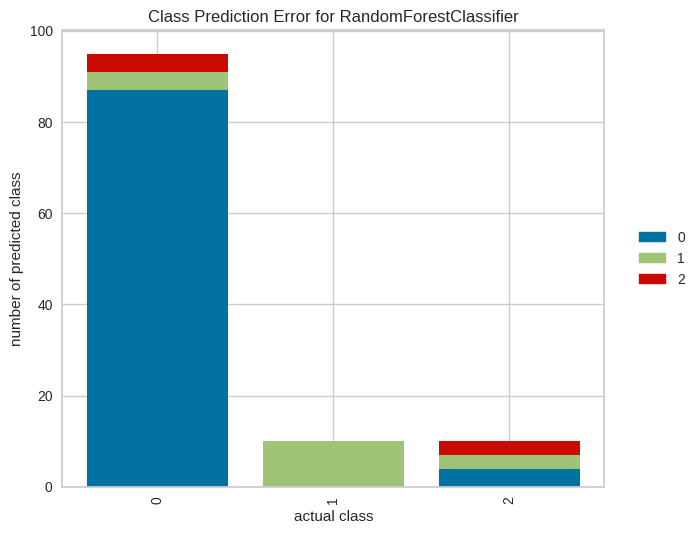

In [376]:
plot_model(tuned_RF, plot = 'error')

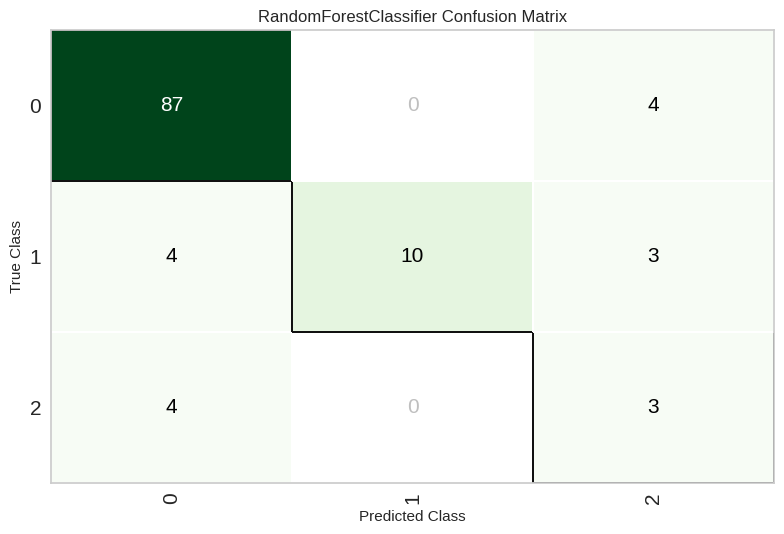

In [490]:
plot_model(tuned_RF, plot = 'confusion_matrix')

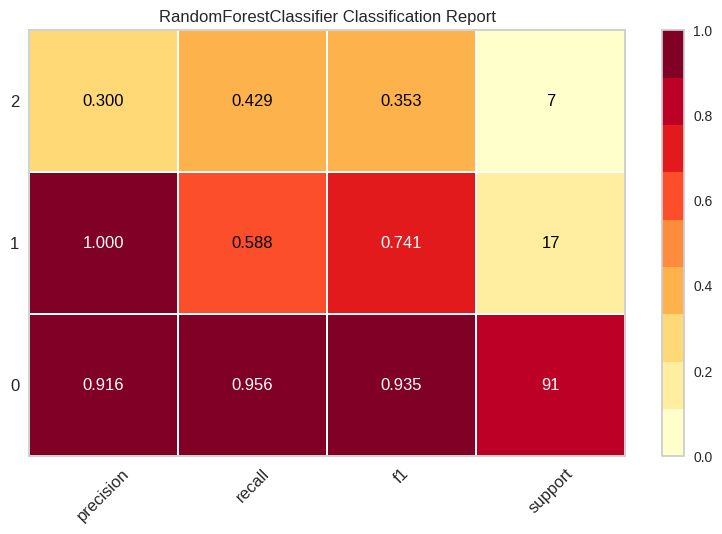

In [491]:
plot_model(tuned_RF, plot = 'class_report')

In [377]:
predict_model(tuned_RF);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8696,0.8149,0.8696,0.8908,0.8712,0.6025,0.6092


In [492]:
final_RF = finalize_model(tuned_RF)

In [493]:
print(final_RF)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['vem1', 'cvf1', 'vemscvf1',
                                             'FEV1FVC_zscore', 'aex1'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Tr...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
          



> ***Prédiction for the other dataset other_dataset***



In [ ]:
#other_dataset_predictions = predict_model(final_RF, data=dataset)
#other_dataset_predictions.head()



> **Saving model**



In [494]:
save_model(final_RF,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['vem1', 'cvf1', 'vemscvf1',
                                              'FEV1FVC_zscore', 'aex1'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Tr...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=


> **Loading the saved model**



In [496]:
#final_RF = load_model(final_RF,'Final RF Model 08Feb2020')

In [497]:
GB = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9694,0.9259,0.8583,0.8906,0.7652,0.7926
1,0.9630,0.9956,0.9630,0.9704,0.9588,0.8985,0.9019
2,0.8889,0.8580,0.8889,0.8313,0.8585,0.6721,0.6836
3,0.8519,0.7222,0.8519,0.8015,0.8089,0.4490,0.5375
4,0.7407,0.7699,0.7407,0.6651,0.6991,0.1127,0.1222
5,0.9259,0.9466,0.9259,0.9276,0.9237,0.7849,0.7901
6,0.8462,0.9546,0.8462,0.8462,0.8462,0.5229,0.5229
7,0.9615,0.9077,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9231,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [498]:
tuned_GB = tune_model(GB, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9202,0.9259,0.8583,0.8906,0.7652,0.7926
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9259,0.9408,0.9259,0.9324,0.9188,0.7672,0.7888
3,0.8889,0.7505,0.8889,0.8287,0.8529,0.6197,0.6719
4,0.8519,0.7727,0.8519,0.8015,0.8089,0.4490,0.5375
5,0.9259,0.8366,0.9259,0.9276,0.9237,0.7849,0.7901
6,0.9231,0.9829,0.9231,0.9744,0.9295,0.7679,0.7819
7,0.9615,0.9215,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.8600,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [499]:
evaluate_model(tuned_GB)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

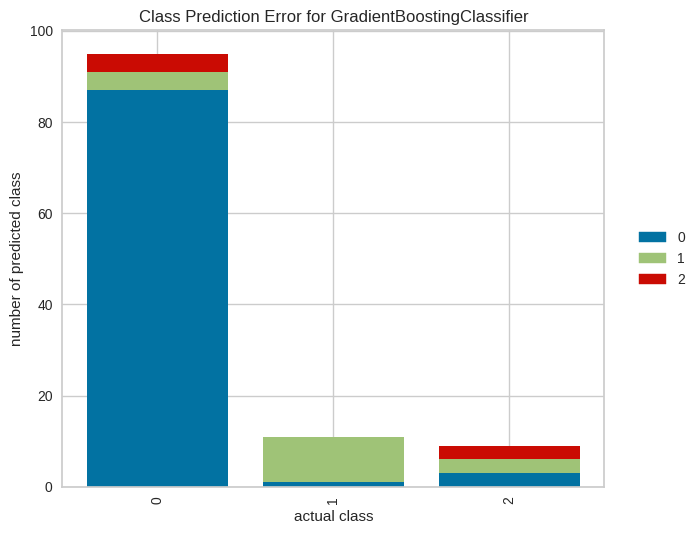

In [500]:
plot_model(tuned_GB, plot = 'error')

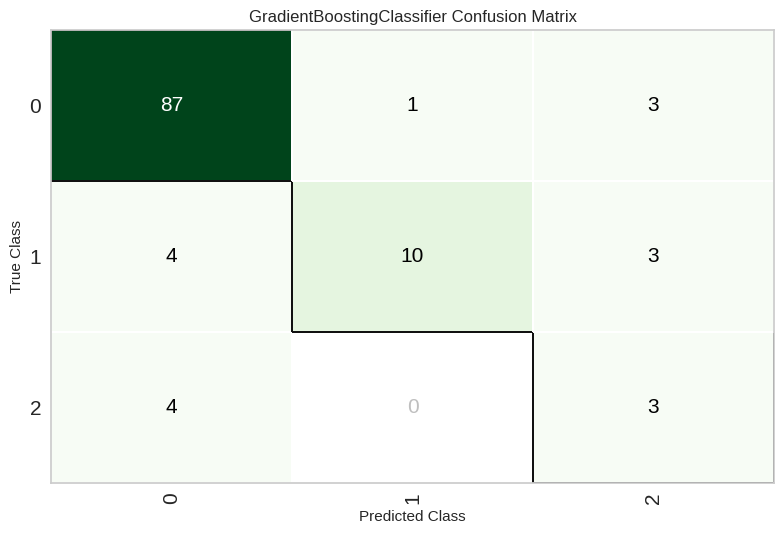

In [501]:
plot_model(tuned_GB, plot = 'confusion_matrix')

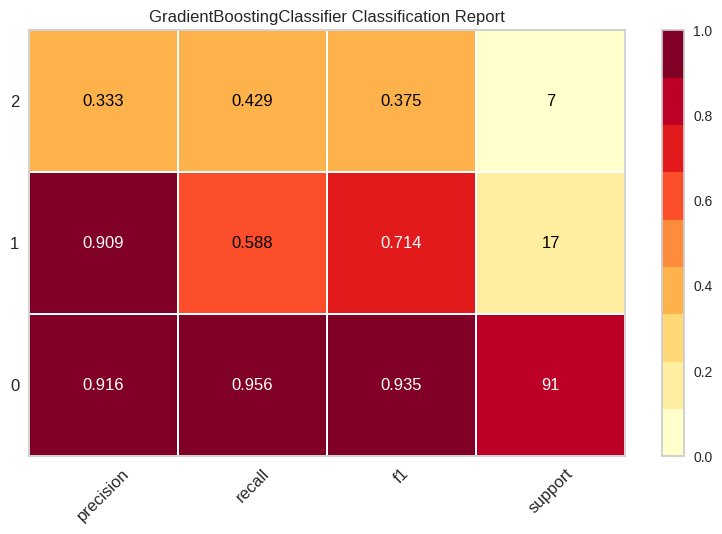

In [502]:
plot_model(tuned_GB, plot = 'class_report')

In [503]:
predict_model(tuned_GB);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8696,0.8582,0.8696,0.8793,0.8687,0.6016,0.6070


In [504]:
LR = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9585,0.8889,0.8287,0.8529,0.6197,0.6719
1,0.9259,0.9815,0.9259,0.8583,0.8906,0.7652,0.7926
2,0.8519,0.8710,0.8519,0.8015,0.8089,0.4490,0.5375
3,0.8148,0.7883,0.8148,0.7764,0.7543,0.2458,0.3727
4,0.7778,0.6895,0.7778,0.6963,0.7257,0.1735,0.2077
5,0.8519,0.8814,0.8519,0.8015,0.8089,0.4490,0.5375
6,0.8846,0.9757,0.8846,0.8606,0.8564,0.5244,0.5945
7,0.9615,0.9492,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9477,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [505]:
tuned_LR = tune_model(LR, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9647,0.8889,0.8287,0.8529,0.6197,0.6719
1,0.9259,0.9815,0.9259,0.8583,0.8906,0.7652,0.7926
2,0.8519,0.8710,0.8519,0.7874,0.8182,0.5304,0.5494
3,0.8148,0.7959,0.8148,0.7764,0.7543,0.2458,0.3727
4,0.7778,0.6788,0.7778,0.6963,0.7257,0.1735,0.2077
5,0.8889,0.8661,0.8889,0.8287,0.8529,0.6197,0.6719
6,0.8846,0.9757,0.8846,0.8606,0.8564,0.5244,0.5945
7,0.9615,0.9508,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9477,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [395]:
evaluate_model(tuned_LR)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

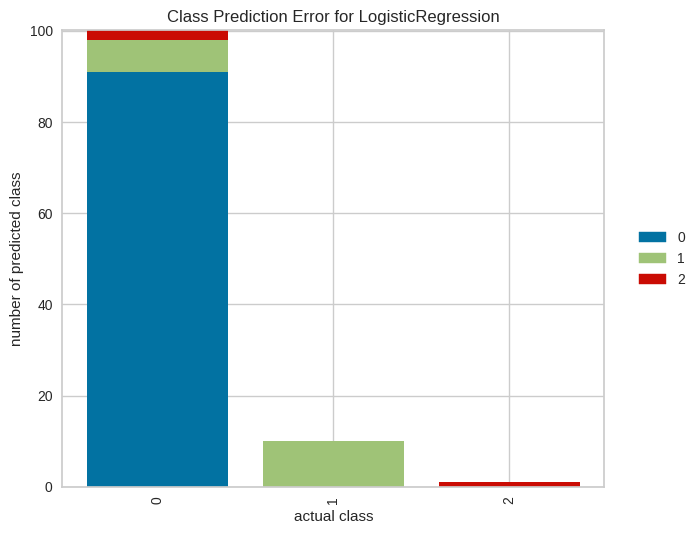

In [396]:
plot_model(tuned_LR, plot = 'error')

In [ ]:
plot_model(tuned_LR, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_LR, plot = 'class_report')

In [397]:
predict_model(tuned_LR);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8870,0.8751,0.8870,0.9011,0.8633,0.5829,0.6407


In [401]:
ANN = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9709,0.9259,0.8583,0.8906,0.7652,0.7926
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9630,0.9563,0.9630,0.9646,0.9607,0.8924,0.8983
3,0.8519,0.8036,0.8519,0.8015,0.8089,0.4490,0.5375
4,0.8148,0.7830,0.8148,0.7469,0.7760,0.3662,0.3971
5,0.8889,0.9251,0.8889,0.8287,0.8529,0.6197,0.6719
6,0.8846,0.9369,0.8846,0.9359,0.8910,0.6518,0.6637
7,0.9615,0.9523,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9015,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [402]:
tuned_ANN = tune_model(ANN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9694,0.9259,0.8583,0.8906,0.7652,0.7926
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9259,0.9579,0.9259,0.9276,0.9202,0.7831,0.7889
3,0.8519,0.8163,0.8519,0.8015,0.8089,0.4490,0.5375
4,0.8519,0.7802,0.8519,0.8015,0.8089,0.4490,0.5375
5,0.8889,0.9204,0.8889,0.8287,0.8529,0.6197,0.6719
6,0.8846,0.9628,0.8846,0.9359,0.8910,0.6518,0.6637
7,0.9615,0.9508,0.9615,0.9248,0.9428,0.8687,0.8781
8,0.9615,0.9046,0.9615,0.9248,0.9428,0.8687,0.8781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [403]:
evaluate_model(tuned_ANN)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

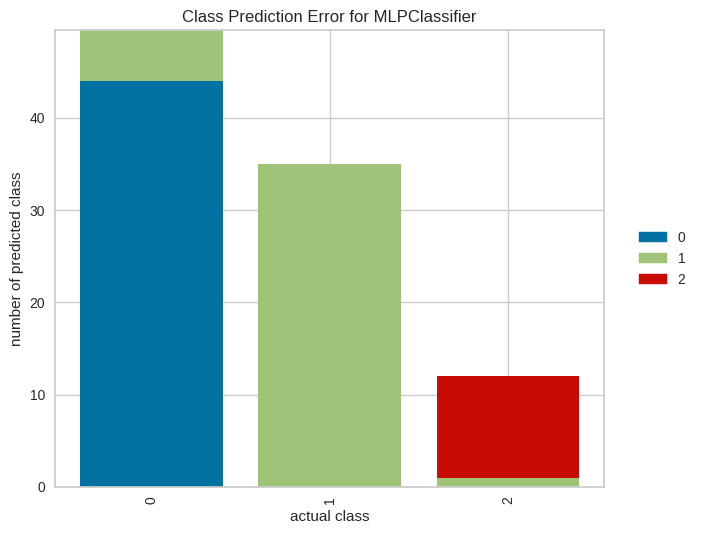

In [410]:
plot_model(tuned_ANN, plot = 'error')

In [480]:
plot_model(tuned_ANN, plot = 'confusion_matrix')

ValueError: ignored

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_model(tuned_ANN, plot = 'class_report')

In [411]:
predict_model(tuned_ANN);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.6716,0.8691,0.6716,0.8097,0.6440,0.5092,0.5888




> Over sampling Reshape



In [412]:
X = data[['vem1', 'cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = data['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

X_over, y_over = oversample.fit_resample(X_train, y_train)

df_o = pd.concat([X_over, y_over], axis = 1)
df_o.shape, df_o['type_trouble'].value_counts()

((444, 6),
 0    148
 2    148
 1    148
 Name: type_trouble, dtype: int64)

In [413]:
c2 = setup (data = df_o, target = 'type_trouble',  session_id=123, verbose = True)

,Description,Value
0,Session id,123
1,Target,type_trouble
2,Target type,Multiclass
3,Original data shape,"(444, 6)"
4,Transformed data shape,"(444, 6)"
5,Transformed train set shape,"(310, 6)"
6,Transformed test set shape,"(134, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [414]:
RF_o = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9032,0.9849,0.9032,0.9091,0.9048,0.8549,0.8562
1,0.8065,0.9106,0.8065,0.8306,0.8073,0.7089,0.7168
2,0.8065,0.9295,0.8065,0.8369,0.8048,0.7098,0.7247
3,0.7419,0.9320,0.7419,0.7921,0.7463,0.6137,0.6327
4,0.8387,0.9484,0.8387,0.8352,0.8356,0.7582,0.7594
5,0.9677,0.9889,0.9677,0.9707,0.9677,0.9516,0.9531
6,0.8387,0.9416,0.8387,0.8411,0.8387,0.7582,0.7594
7,0.8710,0.9589,0.8710,0.8746,0.8674,0.8069,0.8119
8,0.8710,0.9853,0.8710,0.8710,0.8710,0.8062,0.8062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [415]:
tuned_RF_o = tune_model(RF_o, optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9355,0.9905,0.9355,0.9462,0.9368,0.9033,0.9075
1,0.7097,0.9005,0.7097,0.7097,0.6994,0.5620,0.5702
2,0.8065,0.8978,0.8065,0.8369,0.8048,0.7098,0.7247
3,0.7419,0.9220,0.7419,0.7921,0.7463,0.6137,0.6327
4,0.7742,0.9329,0.7742,0.7750,0.7666,0.6620,0.6693
5,0.9032,0.9777,0.9032,0.9050,0.9028,0.8545,0.8558
6,0.8387,0.9293,0.8387,0.8352,0.8356,0.7582,0.7594
7,0.9032,0.9399,0.9032,0.9029,0.9017,0.8549,0.8562
8,0.8387,0.9583,0.8387,0.8534,0.8416,0.7586,0.7621


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [434]:
evaluate_model(tuned_RF_o)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [479]:
plot_model(tuned_RF_o, plot = 'confusion_matrix')

ValueError: ignored

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_model(tuned_RF_o, plot = 'class_report')

In [428]:
GB_o = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8000,0.6000,0.3667,0.4533,0.4118,0.5052
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.4333,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.6000,0.8833,0.6000,0.6667,0.5867,0.3750,0.4009
5,0.2000,0.4500,0.2000,0.4000,0.2667,-0.1111,-0.1336
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [435]:
tuned_GB_o = tune_model(GB_o, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.6000,0.4500,0.6000,0.4667,0.5200,0.3333,0.3608
3,0.8000,0.7500,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.4333,0.4000,0.4667,0.3667,0.1667,0.2004
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [436]:
evaluate_model(tuned_GB_o)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

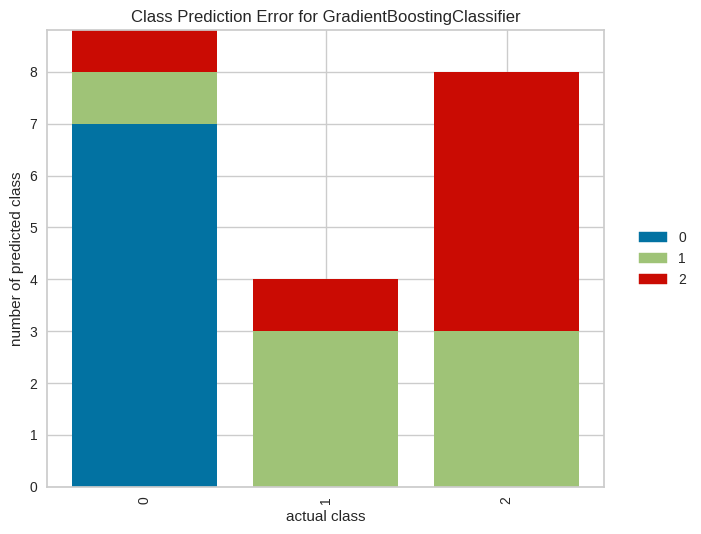

In [431]:
plot_model(tuned_GB_o, plot = 'error')

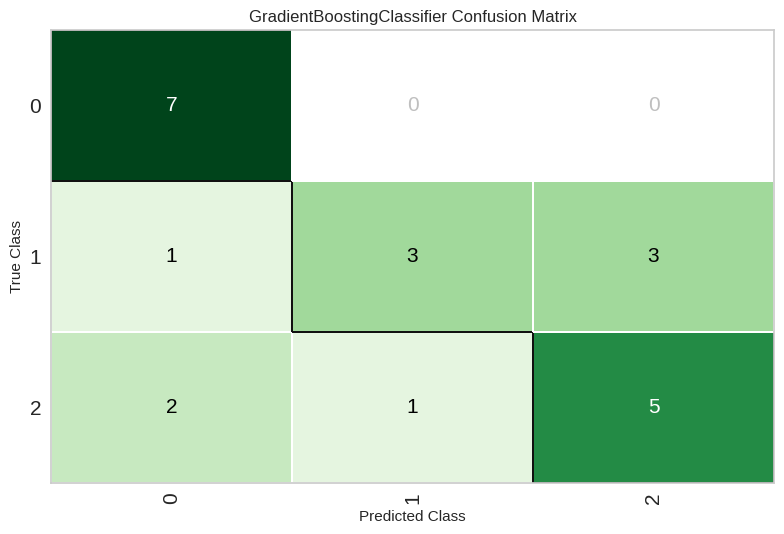

In [478]:
plot_model(tuned_GB_o, plot = 'confusion_matrix')

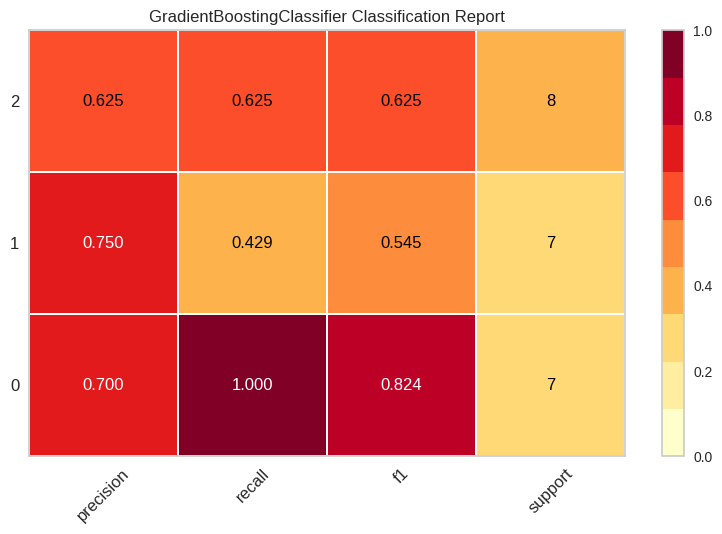

In [477]:
plot_model(tuned_GB_o, plot = 'class_report')

In [437]:
LR_o = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8667,0.6000,0.7000,0.6000,0.4118,0.4375
1,0.4000,0.5333,0.4000,0.2667,0.3000,0.1667,0.2165
2,0.4000,0.7167,0.4000,0.2667,0.3200,0.0625,0.0668
3,0.4000,0.7500,0.4000,0.4000,0.4000,0.0625,0.0625
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6000,0.4000,0.3000,0.3333,0.1176,0.1250
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [438]:
tuned_LR_o = tune_model(GB_o, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.6000,0.4500,0.6000,0.4667,0.5200,0.3333,0.3608
3,0.8000,0.7500,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.4333,0.4000,0.4667,0.3667,0.1667,0.2004
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [439]:
evaluate_model(tuned_LR_o)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

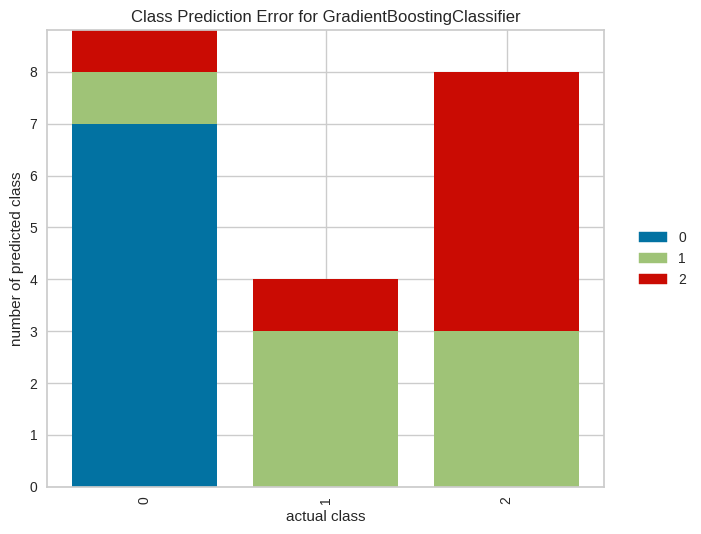

In [440]:
plot_model(tuned_LR_o, plot = 'error')

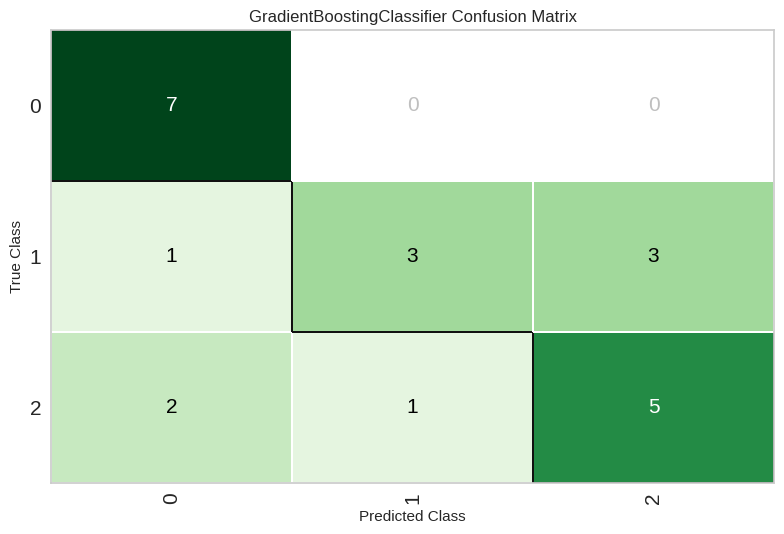

In [475]:
plot_model(tuned_LR_o, plot = 'confusion_matrix')

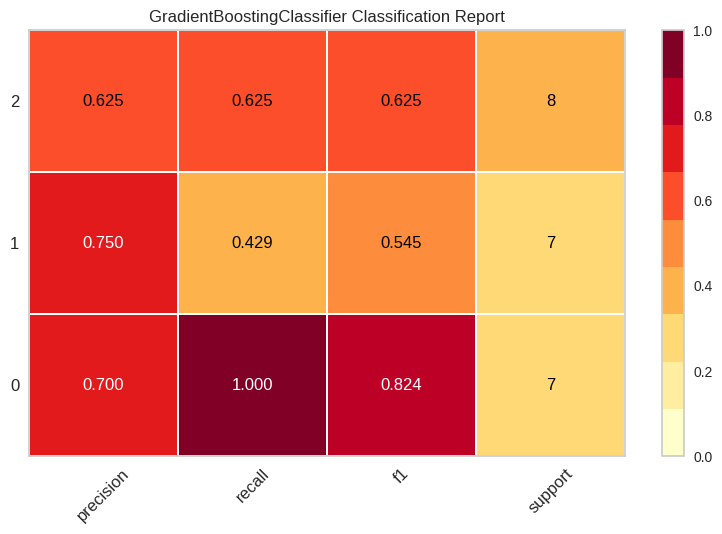

In [476]:
plot_model(tuned_LR_o, plot = 'class_report')

In [441]:
ANN_o = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.7333,0.6000,0.6000,0.6000,0.3750,0.3750
1,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.5667,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.6000,0.9333,0.6000,0.8667,0.6333,0.4444,0.5345
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6167,0.4000,0.3000,0.3333,0.1176,0.1250
6,0.6000,0.8333,0.6000,0.4667,0.5000,0.4444,0.5774
7,0.8000,0.9333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [442]:
tuned_ANN_o = tune_model(ANN_o, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8000,0.6000,0.6000,0.6000,0.3750,0.3750
1,0.8000,0.8000,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.6000,0.7500,0.6000,0.4667,0.5200,0.3333,0.3608
3,0.6000,0.8667,0.6000,0.7000,0.6000,0.4118,0.4375
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6833,0.4000,0.4500,0.3467,0.2105,0.3536
6,0.8000,1.0000,0.8000,0.9000,0.8000,0.7059,0.7500
7,0.6000,0.8667,0.6000,0.6000,0.6000,0.3750,0.3750
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [443]:
evaluate_model(tuned_ANN_o)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

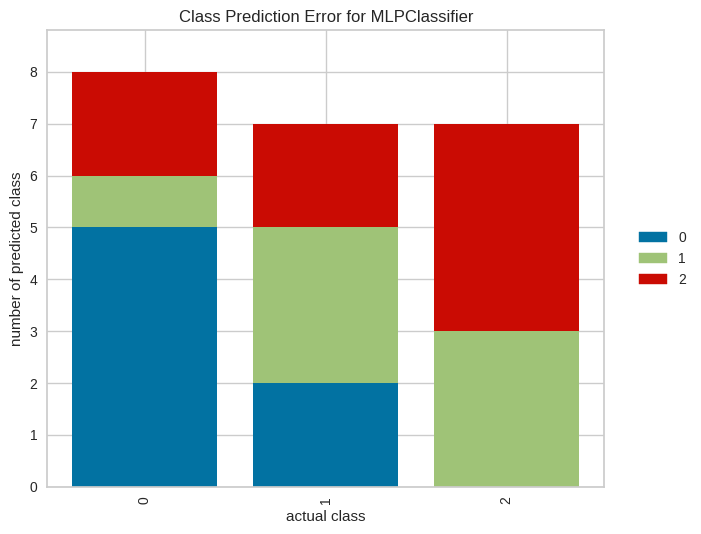

In [444]:
plot_model(tuned_ANN_o, plot = 'error')

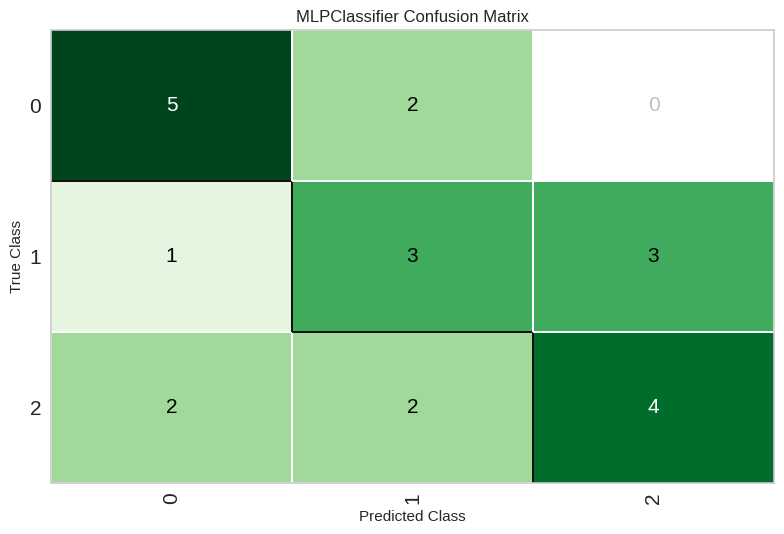

In [473]:
plot_model(tuned_ANN_o, plot = 'confusion_matrix')

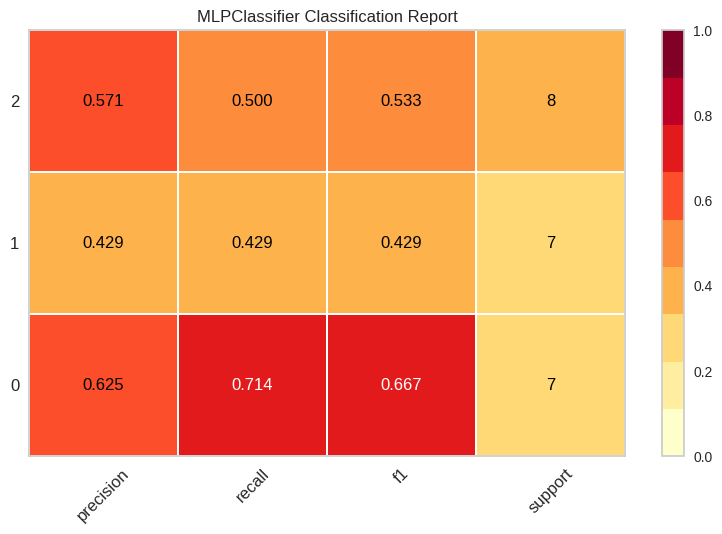

In [474]:
plot_model(tuned_ANN_o, plot = 'class_report')



> Under sampling Reshape



In [462]:
df_u = df[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1', 'type_trouble']]
df_u = pd.concat([X_under, y_under], axis = 1)
df_u.shape, df_u['type_trouble'].value_counts()

((72, 7),
 0    24
 1    24
 2    24
 Name: type_trouble, dtype: int64)

In [446]:
c3 = setup (data = df_u, target = 'type_trouble',  session_id=123, verbose = True)

,Description,Value
0,Session id,123
1,Target,type_trouble
2,Target type,Multiclass
3,Original data shape,"(72, 7)"
4,Transformed data shape,"(72, 7)"
5,Transformed train set shape,"(50, 7)"
6,Transformed test set shape,"(22, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [447]:
RF_u = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.7667,0.6000,0.6000,0.6000,0.3750,0.3750
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.4500,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.8000,0.8000,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.6000,0.8833,0.6000,0.6667,0.5867,0.3750,0.4009
5,0.4000,0.6000,0.4000,0.4667,0.3667,0.1667,0.2004
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [448]:
tuned_RF_u = tune_model(RF_u, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.4333,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.8000,0.7500,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.6000,0.6833,0.6000,0.7000,0.6000,0.4118,0.4375
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [449]:
evaluate_model(tuned_RF_u)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

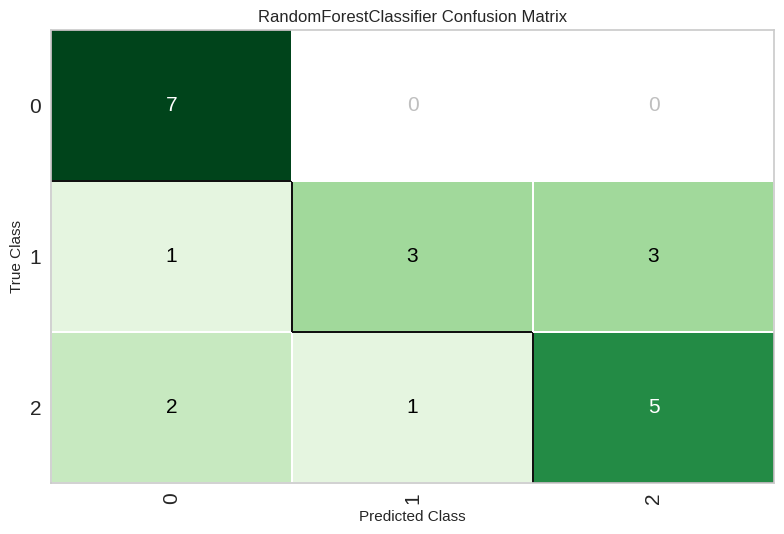

In [471]:
plot_model(tuned_RF_u, plot = 'confusion_matrix')

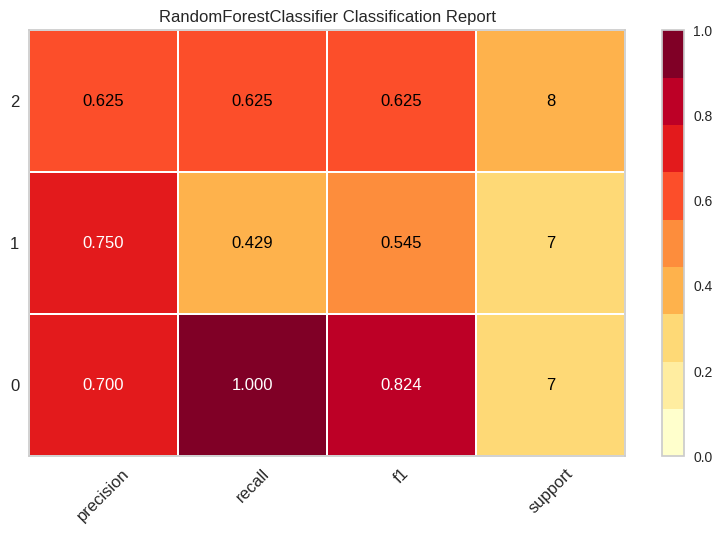

In [472]:
plot_model(tuned_RF_u, plot = 'class_report')

In [450]:
GB_u = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8000,0.6000,0.3667,0.4533,0.4118,0.5052
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.4333,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.6000,0.8833,0.6000,0.6667,0.5867,0.3750,0.4009
5,0.2000,0.4500,0.2000,0.4000,0.2667,-0.1111,-0.1336
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,1.0000,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [451]:
tuned_GB_u = tune_model(GB_u, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
1,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.6000,0.4500,0.6000,0.4667,0.5200,0.3333,0.3608
3,0.8000,0.7500,0.8000,0.9000,0.8000,0.7059,0.7500
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.4333,0.4000,0.4667,0.3667,0.1667,0.2004
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [452]:
evaluate_model(tuned_GB_u)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

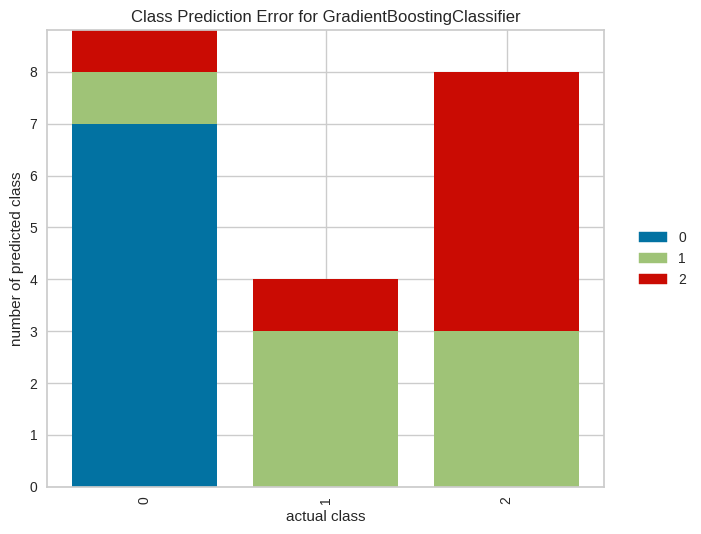

In [453]:
plot_model(tuned_GB_u, plot = 'error')

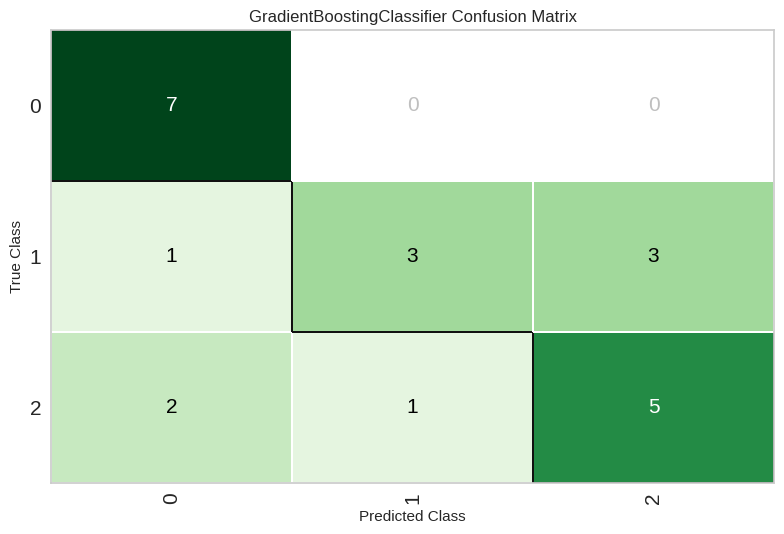

In [469]:
plot_model(tuned_GB_u, plot = 'confusion_matrix')

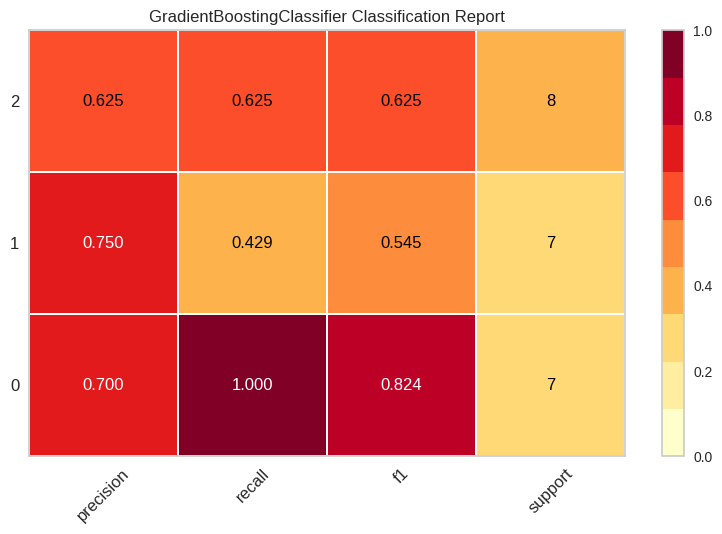

In [470]:
plot_model(tuned_GB_u, plot = 'class_report')

In [454]:
LR_u = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8667,0.6000,0.7000,0.6000,0.4118,0.4375
1,0.4000,0.5333,0.4000,0.2667,0.3000,0.1667,0.2165
2,0.4000,0.7167,0.4000,0.2667,0.3200,0.0625,0.0668
3,0.4000,0.7500,0.4000,0.4000,0.4000,0.0625,0.0625
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6000,0.4000,0.3000,0.3333,0.1176,0.1250
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [455]:
tuned_LR_u = tune_model(LR_u, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8667,0.6000,0.7000,0.6000,0.4118,0.4375
1,0.6000,0.5333,0.6000,0.3667,0.4533,0.4118,0.5052
2,0.4000,0.7167,0.4000,0.2667,0.3200,0.0625,0.0668
3,0.6000,0.7500,0.6000,0.6667,0.5867,0.3750,0.4009
4,0.8000,0.9500,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.5500,0.4000,0.3000,0.3333,0.1176,0.1250
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.6667,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [456]:
evaluate_model(tuned_LR_u)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

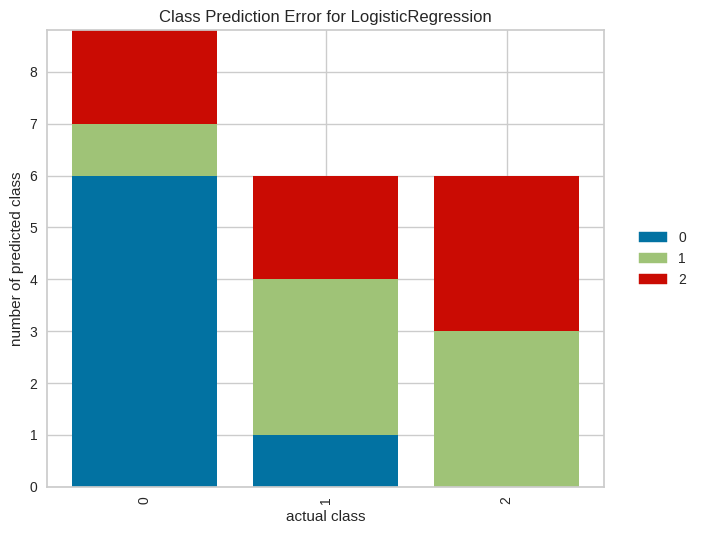

In [457]:
plot_model(tuned_LR_u, plot = 'error')

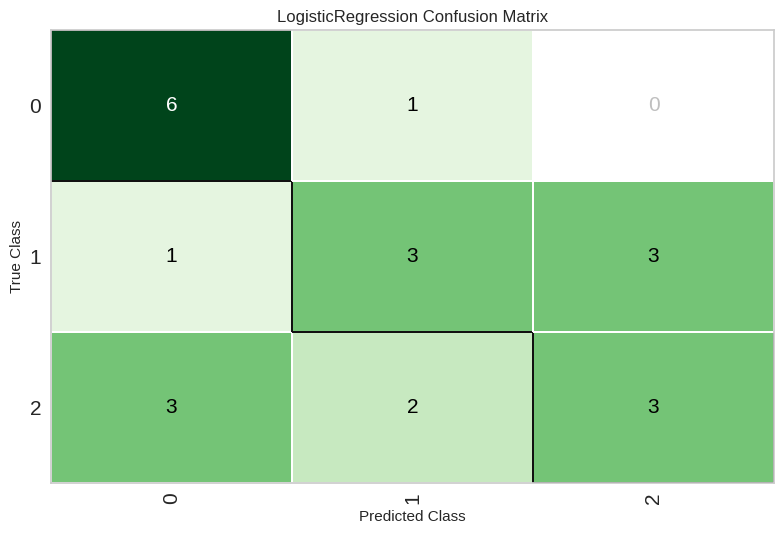

In [467]:
plot_model(tuned_LR_u, plot = 'confusion_matrix')

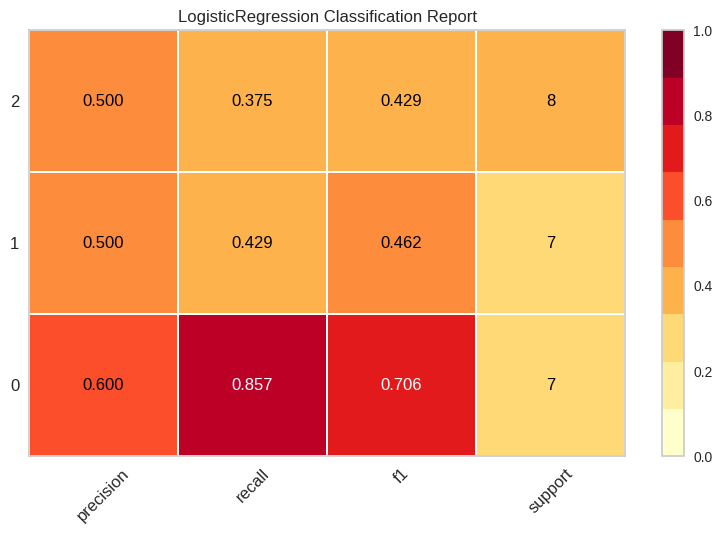

In [468]:
plot_model(tuned_LR_u, plot = 'class_report')

In [458]:
ANN_u = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.7333,0.6000,0.6000,0.6000,0.3750,0.3750
1,0.8000,0.7333,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.4000,0.5667,0.4000,0.3333,0.3600,0.0000,0.0000
3,0.6000,0.9333,0.6000,0.8667,0.6333,0.4444,0.5345
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6167,0.4000,0.3000,0.3333,0.1176,0.1250
6,0.6000,0.8333,0.6000,0.4667,0.5000,0.4444,0.5774
7,0.8000,0.9333,0.8000,0.8667,0.7867,0.6875,0.7350
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [459]:
tuned_ANN_u = tune_model(ANN_u, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8000,0.6000,0.6000,0.6000,0.3750,0.3750
1,0.8000,0.8000,0.8000,0.8667,0.7867,0.6875,0.7350
2,0.6000,0.7500,0.6000,0.4667,0.5200,0.3333,0.3608
3,0.6000,0.8667,0.6000,0.7000,0.6000,0.4118,0.4375
4,0.8000,0.8833,0.8000,0.9000,0.8000,0.7059,0.7500
5,0.4000,0.6833,0.4000,0.4500,0.3467,0.2105,0.3536
6,0.8000,1.0000,0.8000,0.9000,0.8000,0.7059,0.7500
7,0.6000,0.8667,0.6000,0.6000,0.6000,0.3750,0.3750
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [460]:
evaluate_model(tuned_ANN_u)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

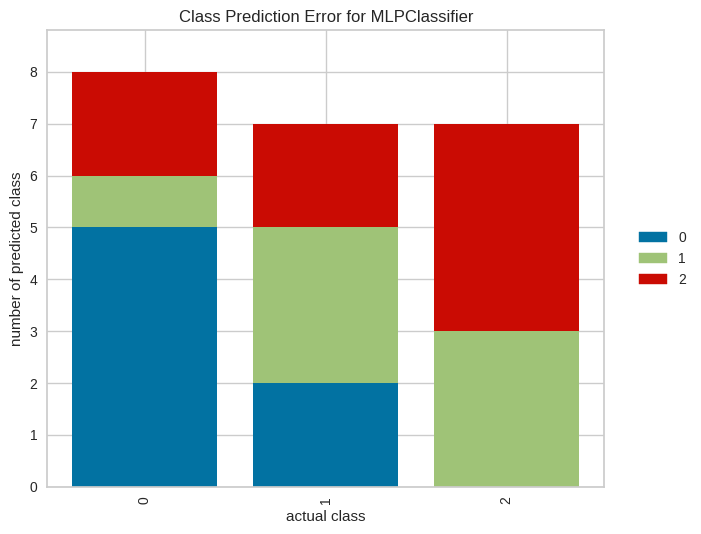

In [461]:
plot_model(tuned_ANN_u, plot = 'error')

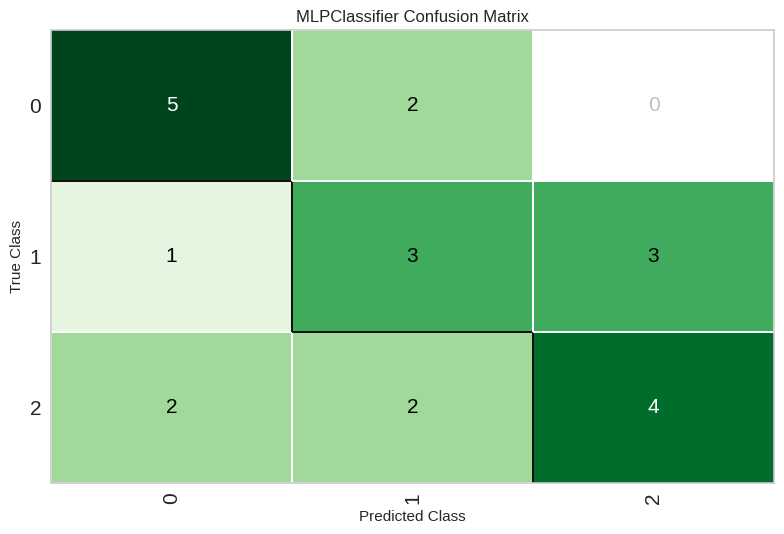

In [465]:
plot_model(tuned_ANN_u, plot = 'confusion_matrix')

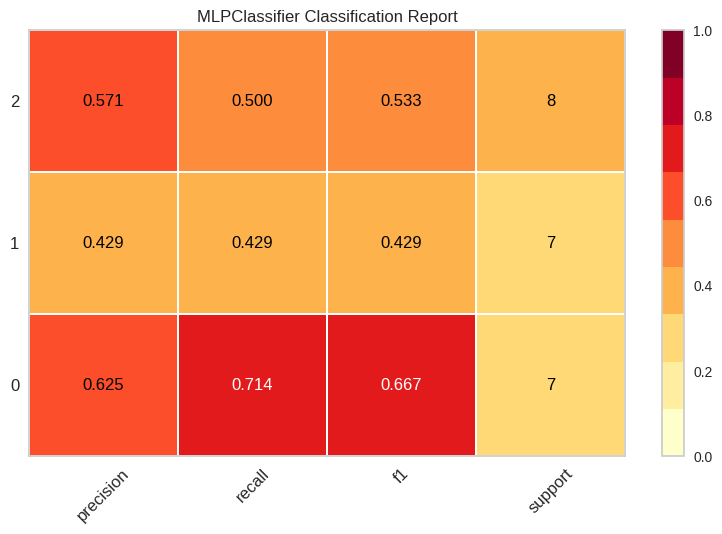

In [466]:
plot_model(tuned_ANN_u, plot = 'class_report')



> **Modèles avec hypers paramètre**



In [426]:
X = data[['vem1','cvf1','vemscvf1','FEV1FVC_zscore','aex1']]
y = data['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

X_train.head(2)

,vem1,cvf1,vemscvf1,FEV1FVC_zscore,aex1
377,2.81,4.16,0.68,-2.00,9.75
44,2.43,2.94,0.83,0.02,8.31




> Instanciation





> Normalisation



In [522]:
X_train_scaled=  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



> Entrainement



In [527]:
print(R.fit(X_train, y_train))
print(G.fit(X_train, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=123, subsample=0.7, 



> Evaluation



In [528]:
print("TRAIN REPORT")
print(classification_report(y_train, RF.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=RF))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       1.00      0.94      0.97        17
           2       1.00      0.62      0.77         8

    accuracy                           0.96        95
   macro avg       0.98      0.86      0.90        95
weighted avg       0.96      0.96      0.95        95

TEST REPORT
[[77  1  0]
 [ 2 10  0]
 [ 3  2  0]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        78
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         5

    accuracy                           0.92        95
   macro avg       0.57      0.61      0.59        95
weighted avg       0.87      0.92      0.89        95

None


In [516]:
print("TRAIN REPORT")
print(classification_report(y_train, GB.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=GB))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       0.94      0.94      0.94        17
           2       1.00      0.50      0.67         8

    accuracy                           0.95        95
   macro avg       0.96      0.81      0.86        95
weighted avg       0.95      0.95      0.94        95

TEST REPORT
[[77  1  0]
 [ 2 10  0]
 [ 3  2  0]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        78
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         5

    accuracy                           0.92        95
   macro avg       0.57      0.61      0.59        95
weighted avg       0.87      0.92      0.89        95

None
